In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC

In [2]:
df_train = pd.read_csv("training_set_features.csv")
df_labels = pd.read_csv("training_set_labels.csv")
df_test = pd.read_csv("test_set_features.csv")



In [3]:
df_train.drop(columns=['employment_industry', 'employment_occupation','hhs_geo_region'], inplace=True)

In [4]:
pd.set_option('display.max_columns', None)
def fill_with_mode(df_train):
    for column in df_train.columns:
        mode_value = df_train[column].mode()[0]
        df_train[column].fillna(mode_value, inplace=True)
    return df_train

df_train = fill_with_mode(df_train)
def fill_with_mode(df_test):
    for column in df_test.columns:
        mode_value = df_test[column].mode()[0]
        df_test[column].fillna(mode_value, inplace=True)
    return df_test

df_test = fill_with_mode(df_test)


In [5]:
df_train[df_train.isnull().any(axis=1)] 
df_train["age_group"].value_counts()

cleanup_age = {"age_group": {"18 - 34 Years": 1, "35 - 44 Years": 2, "45 - 54 Years": 3, "55 - 64 Years": 4,
                                  "65+ Years": 5}}
df_train = df_train.replace(cleanup_age)
df_test = df_train.replace(cleanup_age)


ord_enc = OrdinalEncoder()
df_train["ed_code"] = ord_enc.fit_transform(df_train[["education"]])
df_train["race_code"] = ord_enc.fit_transform(df_train[["race"]])
df_train["sex_code"] = ord_enc.fit_transform(df_train[["sex"]])
df_train["income_poverty_code"] = ord_enc.fit_transform(df_train[["income_poverty"]])
df_train["marital_status_code"] = ord_enc.fit_transform(df_train[["marital_status"]])
df_train["rent_or_own_code"] = ord_enc.fit_transform(df_train[["rent_or_own"]])
df_train["employment_status_code"] = ord_enc.fit_transform(df_train[["employment_status"]])
df_train["census_msa_code"] = ord_enc.fit_transform(df_train[["census_msa"]])
df_train.drop(columns=['education', 'race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa'], inplace=True)



df_test["ed_code"] = ord_enc.fit_transform(df_test[["education"]])
df_test["race_code"] = ord_enc.fit_transform(df_test[["race"]])
df_test["sex_code"] = ord_enc.fit_transform(df_test[["sex"]])
df_test["income_poverty_code"] = ord_enc.fit_transform(df_test[["income_poverty"]])
df_test["marital_status_code"] = ord_enc.fit_transform(df_test[["marital_status"]])
df_test["rent_or_own_code"] = ord_enc.fit_transform(df_test[["rent_or_own"]])
df_test["employment_status_code"] = ord_enc.fit_transform(df_test[["employment_status"]])
df_test["census_msa_code"] = ord_enc.fit_transform(df_test[["census_msa"]])
df_test.drop(columns=['education', 'race','sex','income_poverty','marital_status','rent_or_own','employment_status','census_msa'], inplace=True)

df_test


,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,household_adults,household_children,ed_code,race_code,sex_code,income_poverty_code,marital_status_code,rent_or_own_code,employment_status_code,census_msa_code
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,4,0.0,0.0,1.0,3.0,0.0,2.0,1.0,0.0,1.0,2.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,2,0.0,0.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1,2.0,0.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,5,0.0,0.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,3,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,5,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,2.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1,1.0,0.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,4,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1,1.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


In [6]:
feature_df_train = df_train.drop(columns=['respondent_id'])
feature_df_test = df_test.drop(columns=['respondent_id'])
target_df_train_xyz = df_labels[['xyz_vaccine']]
target_df_train_seasonal = df_labels[['seasonal_vaccine']]

X_train, X_test, y_train, y_test = train_test_split(feature_df_train, target_df_train_xyz, test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_df_train, target_df_train_seasonal, test_size=0.2, random_state=42)
model_xyz = LogisticRegression()
model_xyz.fit(X_train, y_train)

model_seasonal = LogisticRegression()
model_seasonal.fit(X_train1, y_train1)

df = pd.DataFrame()
df['prob_xyz_vacc'] = model_xyz.predict_proba(X_test)[:, 1]

df['prob_seasonal_vacc'] = model_seasonal.predict_proba(X_test1)[:, 1]


c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AUC Score for xyz_vaccine using LogReg: 0.8272806730033868
AUC Score for seasonal_vaccine using LogReg: 0.8492074546973323
Mean score using LogReg:0.8382440638503595


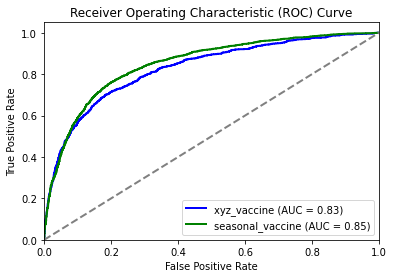

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, df['prob_xyz_vacc'])
fpr1, tpr1, thresholds1 = roc_curve(y_test1, df['prob_seasonal_vacc'])

# Calculate AUC score
auc_score = roc_auc_score(y_test, df['prob_xyz_vacc'],average='macro')
auc_score1 = roc_auc_score(y_test1, df['prob_seasonal_vacc'],average='macro')

print(f"AUC Score for xyz_vaccine using LogReg: {auc_score}")
print(f"AUC Score for seasonal_vaccine using LogReg: {auc_score1}")
print(f"Mean score using LogReg:{(auc_score + auc_score1)/2}")
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'xyz_vaccine (AUC = {auc_score:.2f})')
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'seasonal_vaccine (AUC = {auc_score1:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [8]:
model1_xyz = GaussianNB()
model1_xyz.fit(X_train, y_train)
model1_seasonal = GaussianNB()
model1_seasonal.fit(X_train1, y_train1)

df1 = pd.DataFrame()
df1['prob_xyz_vacc'] = model1_xyz.predict_proba(X_test)[:, 1]

df1['prob_seasonal_vacc'] = model1_seasonal.predict_proba(X_test1)[:, 1]

c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [9]:

auc_score2 = roc_auc_score(y_test, df1['prob_xyz_vacc'],average='macro')
auc_score3 = roc_auc_score(y_test1, df1['prob_seasonal_vacc'], average='macro')

print(f"AUC Score for xyz_vaccine using GauNB: {auc_score2}")
print(f"AUC Score for seasonal_vaccine using GauNB: {auc_score3}")
print(f"Mean score using GauNB:{(auc_score2 + auc_score3)/2}")

AUC Score for xyz_vaccine using GauNB: 0.7857978468597937
AUC Score for seasonal_vaccine using GauNB: 0.8040314480666444
Mean score using GauNB:0.794914647463219


In [10]:
svc_xyz = SVC(kernel='rbf', probability=True) 
svc_xyz.fit(X_train, y_train)
svc_seasonal = SVC(kernel='rbf', probability=True) 
svc_seasonal.fit(X_train1, y_train1)

df2 = pd.DataFrame()
df2['prob_xyz_vacc']= svc_xyz.predict_proba(X_test)[:,1]

df2['prob_seasonal_vacc'] = svc_seasonal.predict_proba(X_test1)[:,1]


c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\sudhir\Documents\Python Scripts\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
auc_score4 = roc_auc_score(y_test, df2['prob_xyz_vacc'],average='macro')
auc_score5 = roc_auc_score(y_test1, df2['prob_seasonal_vacc'],average='macro')

print(f"AUC Score for xyz_vaccine using SVM: {auc_score4}")
print(f"AUC Score for seasonal_vaccine using SVM: {auc_score5}")
print(f"Mean score using SVM:{(auc_score4 + auc_score5)/2}")

AUC Score for xyz_vaccine using SVM: 0.8012639823849262
AUC Score for seasonal_vaccine using SVM: 0.8575593214693923
Mean score using SVM:0.8294116519271593


In [ ]:
final_df = pd.DataFrame()
final_df['h1n1_vaccine'] = model_xyz.predict_proba(feature_df_test)[:, 1]
final_df['seasonal_vaccine'] = model_seasonal.predict_proba(feature_df_test)[:, 1]
df_test['respondent_id'] = df_test['respondent_id'].apply(lambda x: x + 26707)
final_df.insert(0, 'respondent_id',df_test['respondent_id'])
final_df.to_csv('output.csv', index=False)